In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import re
from numpy import asarray
from numpy import savez_compressed
from src.descargardataset import descargarDataset
from src.configuracion import PathTest,PathTraining
from src.renombrar import renombrarFrutas

### Preparo los datos de entrenamiento

In [8]:
clase,imagen_fruta = descargarDataset(PathTraining)
print((imagen_fruta.shape,clase.shape))

((60486, 45, 45, 3), (60486,))


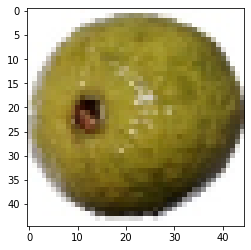

In [9]:
plt.imshow(imagen_fruta[55678])

In [10]:
print(clase)

['Apple Golden 3' 'Apple Golden 3' 'Apple Golden 3' ... 'Pitahaya Red'
 'Pitahaya Red' 'Pitahaya Red']


### Renombrar las frutas 


In [11]:
nombre_frutas_corregido = np.array(renombrarFrutas(clase))
(nombre_frutas_corregido.shape)

(60486,)

#### Voy a crear una etiqueta para cada fruta

In [12]:
nombres_fruta ={elemento:indice for indice,elemento in enumerate(np.unique(nombre_frutas_corregido))}
display(nombres_fruta)

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden ': 2,
 'Apple Granny Smith': 3,
 'Apple Pink Lady': 4,
 'Apple Red ': 5,
 'Apple Red Delicious': 6,
 'Apple Red Yellow ': 7,
 'Apricot': 8,
 'Avocado': 9,
 'Avocado ripe': 10,
 'Banana': 11,
 'Banana Lady Finger': 12,
 'Banana Red': 13,
 'Beetroot': 14,
 'Blueberry': 15,
 'Cactus fruit': 16,
 'Cantaloupe ': 17,
 'Carambula': 18,
 'Cauliflower': 19,
 'Cherry ': 20,
 'Cherry Rainier': 21,
 'Cherry Wax Black': 22,
 'Cherry Wax Red': 23,
 'Cherry Wax Yellow': 24,
 'Chestnut': 25,
 'Clementine': 26,
 'Cocos': 27,
 'Dates': 28,
 'Eggplant': 29,
 'Ginger Root': 30,
 'Granadilla': 31,
 'Grape Blue': 32,
 'Grape Pink': 33,
 'Grape White': 34,
 'Grape White ': 35,
 'Grapefruit Pink': 36,
 'Grapefruit White': 37,
 'Guava': 38,
 'Hazelnut': 39,
 'Huckleberry': 40,
 'Kaki': 41,
 'Kiwi': 42,
 'Kohlrabi': 43,
 'Kumquats': 44,
 'Lemon': 45,
 'Lemon Meyer': 46,
 'Limes': 47,
 'Lychee': 48,
 'Mandarine': 49,
 'Mango': 50,
 'Mango Red': 51,
 

In [13]:
etiqueta_fruta = np.array([nombres_fruta[x] for x in nombre_frutas_corregido])
etiqueta_fruta.shape,imagen_fruta.shape

((60486,), (60486, 45, 45, 3))

## Preparo los datos para el test


### Descargo el dataset de test

In [14]:
test_clase,test_imagenes = descargarDataset(PathTest)

In [15]:
test_clase.shape,test_imagenes.shape

((20618,), (20618, 45, 45, 3))

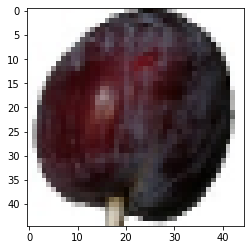

In [16]:
plt.imshow(test_imagenes[6000])


### Renombrar el nombre de las frutas


In [17]:
test_clase_corregido =renombrarFrutas(test_clase)

#### Voy a crear una etiqueta para cada fruta

In [18]:
nombres_fruta_testeo ={elemento:indice for indice,elemento in enumerate(np.unique(test_clase_corregido))}
test_etiqueta = np.array([nombres_fruta_testeo[x] for x in test_clase_corregido])
test_etiqueta.shape


(20618,)

In [19]:
print(test_clase.shape,test_imagenes.shape,test_etiqueta.shape)

(20618,) (20618, 45, 45, 3) (20618,)


### Creamos unos archivos con los datos terminados


In [32]:
lista_archivos_guardar = ["test_imagenes","test_etiqueta","etiqueta_fruta","imagen_fruta"]
np.save(f'./Input/test_etiqueta', test_etiqueta)
np.save(f'./Input/etiqueta_fruta', etiqueta_fruta)
np.save(f'./Input/imagen_fruta', imagen_fruta)
np.save(f'./Input/test_imagenes', test_imagenes)